# Тестовое задание

Имеется набор данных со следующими столбцами:
1. Идентификатор документа
2. Идентификатор товара (уникальный номер единицы товара, находящейся в сервисном центре)
3. Операция документа
4. Дата документа
5. Идентификатор филиала, создавшего документ
 
 
Этот набор данных связан со справочником филиалов. Справочник содержит следующие поля:
1. Идентификатор филиала
2. Наименование филиала
3. Наименование региона филиала


Необходимо рассчитать среднее время нахождения товара в сервисном центре:
1. Общая динамика по месяцам
2. Динамика по неделям в разрезе регионов
Вывести нормативный срок по всей компании. Графически представить динамику отклонения от нормы по каждому региону.


In [1126]:
import pandas as pd
from IPython.display import display

In [1127]:
data = pd.read_csv('data.csv')
data.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


    Отлично, битая кодировка. Посмотрим какая же там на самом деле. Сразу-ка напишем функцию, чтоб не мучаться.

In [1128]:
def reader(path):
    with open('data.csv', 'rb') as f:
        result = chardet.detect(f.readline())
    print (result)
    return(result)

In [1129]:
reader_result =reader('data.csv') 
data = pd.read_csv('data.csv', encoding=result['encoding'])
data.head()

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


Ну ладно, видимо такие идентификаторы. Допустим. Посмотрим сразу что у нас по поводу пустых данных и дубляжей

In [1130]:
display(data.duplicated().sum())
display(data.isna().sum())

0

Идентификатор документа            0
Идентификатор товара               0
Вид операции документа             0
Дата документа                     0
Идентификатор филиалы документа    0
dtype: int64

Отлично, дубляжей и пропущенных значений нет. Посмотрим на типы

In [1131]:
data.dtypes

Идентификатор документа            object
Идентификатор товара               object
Вид операции документа             object
Дата документа                     object
Идентификатор филиалы документа    object
dtype: object

Ну это не дело. Дата точно должна быть датой

In [1132]:
data['Дата документа'] = pd.to_datetime(data['Дата документа'], format = '%Y-%m-%d')
data.dtypes

Идентификатор документа                    object
Идентификатор товара                       object
Вид операции документа                     object
Дата документа                     datetime64[ns]
Идентификатор филиалы документа            object
dtype: object

Другое дело. Теперь можно подгрузить второй файл и потом их срастить

In [1133]:
result_reader = reader('Справочник фирм.csv')
guidbook = pd.read_csv('Справочник фирм.csv', encoding=result['encoding'])
display(guidbook.head())

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


,Наименование филиала,Наименование региона филиала,Идентификатор филиала
0,Филиал 1,Регион 1,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'"
1,Филиал 2,Регион 1,b'\xb5Mv\xe3\x86\xc3\x9a\x0b\x10\xb2\xba\xfa\x...
2,Филиал 3,Регион 1,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"
3,Филиал 4,Регион 2,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f'
4,Филиал 5,Регион 3,b'\xb85\xa2\xe7\x1b\x8d\xd5\xff\x0bd>\xdcR:\xd...


Все также, проверим на дубли, пропуски, приведем типы

In [1134]:
display(guidbook.duplicated().sum())
display(guidbook.isna().sum())
display(guidbook.dtypes)

0

Наименование филиала            0
Наименование региона филиала    0
Идентификатор филиала           0
dtype: int64

Наименование филиала            object
Наименование региона филиала    object
Идентификатор филиала           object
dtype: object

Присоседим одну таблицу к другой. Но для этого нужно чтоб либо поля назывались одинаково и можно смерджить, либо чтоб индексы были установленны на поля с идентификаторами филиала. 

In [1135]:
df = data.set_index('Идентификатор филиалы документа').join(guidbook.set_index('Идентификатор филиала'), how='left')
df = df.reset_index()
df =df.rename(columns={'index':'Идентификатор филиала'})
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916597 entries, 0 to 2916596
Data columns (total 7 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Идентификатор филиала         object        
 1   Идентификатор документа       object        
 2   Идентификатор товара          object        
 3   Вид операции документа        object        
 4   Дата документа                datetime64[ns]
 5   Наименование филиала          object        
 6   Наименование региона филиала  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 155.8+ MB


None

Ну и проверим, что мы никакие данные не потеряли

In [1136]:
display(len(data)==len(df))
display(df.isna().sum())
display(df.tail(5))

True

Идентификатор филиала           0
Идентификатор документа         0
Идентификатор товара            0
Вид операции документа          0
Дата документа                  0
Наименование филиала            0
Наименование региона филиала    0
dtype: int64

,Идентификатор филиала,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Наименование филиала,Наименование региона филиала
2916592,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei',b'\xf0Q\xff\x9d\xbd\xe8:\x089 \xdc\x17\xbe\x8d...,b'\x8a\xa4@\xdeP\x02\xbb\xb7\xf34\x15\xec\xb8\...,Выдача товара,2020-01-01,Филиал 38,Регион 8
2916593,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei',b'\xb4e\xdab@/\x80\x109\xd1\xef]U\xbe\x07\xa0',"b'A,7\xc7>d*q\x0bI\x8d3p\x07NT'",Выдача товара,2020-01-01,Филиал 38,Регион 8
2916594,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei',b'\xa3i4\x0c\xda`F:\xf2\xa9\xb0B\xaa\xff\xd1b',b'\xc6dy\x84\xe1\xed\xaat\xabk\x1f9\xecF8\x97',Выдача товара,2020-01-01,Филиал 38,Регион 8
2916595,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei',"b'\x159\xd7\xd5\xb2\xce""\x1b\xa5\xf4\x82\x00-\...",b'^\xb4\x91]\xfd\xe5V\xbeG\xcetmi8\xd8\xaa',Выдача товара,2020-01-01,Филиал 38,Регион 8
2916596,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei',b'\xda\xec\xac\x15\x10\xca\x7f\xb8RY\x9bB\x93|...,b'<0\x0f\xe5IxN|\x99j\xdd\x13]\x8cFn',Выдача товара,2020-01-01,Филиал 38,Регион 8


Чтобы расчитать среднее время прибывания товара в сервесном центре нужно понимать, с каким документом товар попадает в сервисный центр и с каким документом покидает его

In [1137]:
display(df['Вид операции документа'].unique())

array(['Прием товара', 'Выдача товара'], dtype=object)

Отлично, а что насчет филиалов, все-ли он сервисные центры (имеют "СЦ" в названии)? Если нет, то нам нужно только время от приема в сервис и до выдачи из сервиса, а сколько товар там гуляет между филиалами - не наша забота. Поскольку я сознательно изменил входные данные так, чтобы обеспечить конфиденциальность входным данным, то следующий блок не имеет никакого смысла.

In [1138]:
display(len(df['Наименование филиала'].str.endswith(' СЦ')) == len(df) )

True

Отлично, значит у нас только сервисные центры. Переименуем колонки, чтоб в дальнейшем не быть самим себе злым Буратино

In [1139]:
df = df.rename(columns={'Идентификатор филиала': 'id_shop', 'Идентификатор документа': 'id_doc','Идентификатор товара':'id_goods',
                   'Вид операции документа':'type_of_operation','Дата документа':'date',
                   'Наименование филиала':'shop','Наименование региона филиала':'region'})



Сделаем новое поле "Филиал-товар" и будем по нему смотреть самую раннюю дату приема товара и самую познюю дата выдачи товара. Таким образом найдя разность-узнаем количество времени которое товар провел в сервисном центре

In [1140]:
df['shop_goods'] = df['id_shop']+ " | " +df['id_goods']


In [1141]:
df_sorted = df.sort_values(['shop_goods','type_of_operation','date'], ascending=[True,False,True]).copy()

Проверим

In [1142]:
import random

for i in range(0,5):
    display(df_sorted[df_sorted['shop_goods'] == df['shop_goods'][random.randrange(0, len(df)-1,1)]])

,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2779998,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',b')h\x7f\xb2\x02Iy\xfa;l;\x96\xd6\xea\x93\x9f',"b'""O\x8b\xbc\x92\x8c\xdcBm\xf1\x81\xeb\x17\xbd...",Прием товара,2019-01-31,Филиал 90,Регион 2,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10'...
2781120,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',b'\x82\xe6\xc9%\xa7b\xb8\x9a\xaer\xf0\xd9\xfc\...,"b'""O\x8b\xbc\x92\x8c\xdcBm\xf1\x81\xeb\x17\xbd...",Выдача товара,2019-02-21,Филиал 90,Регион 2,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10'...


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
1841083,b'\xc4\xf8\xbfpY\xc6\xa5\x9f\x06\x95sy>*\x93O',b'\xedz\xe0\x0b\x86\xd2\xc3\x14\xf0\xc1$\xea\x...,b'h\xa33~}3\xaeC9q\x89\xf1_\xee\xc8\xc3',Прием товара,2019-06-29,Филиал 66,Регион 5,b'\xc4\xf8\xbfpY\xc6\xa5\x9f\x06\x95sy>*\x93O'...
1842625,b'\xc4\xf8\xbfpY\xc6\xa5\x9f\x06\x95sy>*\x93O',b'I\xf8\x10\xbb)\xc2\xb5%\x1c\x16\xf2\x80|\x15}W',b'h\xa33~}3\xaeC9q\x89\xf1_\xee\xc8\xc3',Выдача товара,2019-07-26,Филиал 66,Регион 5,b'\xc4\xf8\xbfpY\xc6\xa5\x9f\x06\x95sy>*\x93O'...


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
1385926,b'\xa8\xf4\xee\xe2s\x16c\xe9J_L\xbd\xf8\xf7q$',b'\xccP\xee.\xf3\x14\xf6\xd9\xea\xe6\xb0*\xa6\...,b'\x1e\x8c\x88Q\x8ccz\x85\xbc\xbb\x80\x91h_;\x15',Прием товара,2019-07-07,Филиал 144,Регион 5,b'\xa8\xf4\xee\xe2s\x16c\xe9J_L\xbd\xf8\xf7q$'...
1388306,b'\xa8\xf4\xee\xe2s\x16c\xe9J_L\xbd\xf8\xf7q$',b'jz\xa7~\xef]\x87\xc7\xba\x14V\x16\xaa\xc7\x9...,b'\x1e\x8c\x88Q\x8ccz\x85\xbc\xbb\x80\x91h_;\x15',Выдача товара,2019-08-21,Филиал 144,Регион 5,b'\xa8\xf4\xee\xe2s\x16c\xe9J_L\xbd\xf8\xf7q$'...


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2556458,b']t\x81\xa1\x03r[\xb1\xa5\r\xd9.\x15:\xe9\xb3',b'\xf9\x03%\xe8\x03\xe0\xcfq\x9a\x13e\x8d\xffwqj',"b'{<\xf3\x12\x03\x08\xce5\xda\xfaJ\xea\r""\xea\...",Прием товара,2019-10-03,Филиал 16,Регион 3,b']t\x81\xa1\x03r[\xb1\xa5\r\xd9.\x15:\xe9\xb3...
2556966,b']t\x81\xa1\x03r[\xb1\xa5\r\xd9.\x15:\xe9\xb3',b'\xea\xba!3\x0c\x7fAy>\xf1Ctn\xc3\x1dR',"b'{<\xf3\x12\x03\x08\xce5\xda\xfaJ\xea\r""\xea\...",Выдача товара,2019-10-13,Филиал 16,Регион 3,b']t\x81\xa1\x03r[\xb1\xa5\r\xd9.\x15:\xe9\xb3...


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
190015,b'#\x17iM\x973\xdd\x93\xa0)\xf3w\n70\x84',b'G\x12r\xab\x1f@6\x1a\xc0\x8cS\xd0\xc9\xa1\x1...,b'\x03\xd98\xa7\n\x8aiB\xe3\x88%BP\x8b\xa2\xc8',Прием товара,2019-09-19,Филиал 122,Регион 10,b'#\x17iM\x973\xdd\x93\xa0)\xf3w\n70\x84' | b'...
192063,b'#\x17iM\x973\xdd\x93\xa0)\xf3w\n70\x84',b'H\xfb\xd3\xcd\x97\xfb\x04O*\x08\xe1*\xae\xb2...,b'\x03\xd98\xa7\n\x8aiB\xe3\x88%BP\x8b\xa2\xc8',Выдача товара,2019-10-26,Филиал 122,Регион 10,b'#\x17iM\x973\xdd\x93\xa0)\xf3w\n70\x84' | b'...


Отлично, вроде все хорошо. Теперь можно сделать отдельный фрейм, в котором будут все товары и по ним посчитать время проведенное в сервисном центре. Поскольку могут быть товары сданные, но еще не выданные, то будем отбирать только те пары, для которых есть документы приема и документы выдачи


In [1143]:
# выберем те, для которых есть дата выдачи
time_spend = pd.DataFrame({'shop_goods':df_sorted[df_sorted['type_of_operation']=='Выдача товара']['shop_goods'].unique().copy()})
time_spend = time_spend.reset_index(drop=True)
df_sorted = df_sorted.reset_index(drop=True)

# и оставим только те, у которых есть дата приема
time_spend = time_spend[time_spend['shop_goods'].isin(df_sorted[df_sorted['type_of_operation']=='Прием товара']['shop_goods'])].copy()

In [1144]:
time_spend['date_in'] = df_sorted[(df_sorted['shop_goods'].isin(time_spend['shop_goods']))&(df_sorted['type_of_operation']=='Прием товара')]['date'].reset_index(drop=True)

time_spend['date_out'] = df_sorted[(df_sorted['shop_goods'].isin(time_spend['shop_goods']))&(df_sorted['type_of_operation']=='Выдача товара')]['date'].reset_index(drop=True)

display(time_spend)

,shop_goods,date_in,date_out
0,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b"" \xe...",2019-08-09,2019-08-16
1,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""!\xd...",2019-04-28,2019-05-11
2,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#'\x...",2019-11-24,2019-12-06
3,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#\x0...",2019-02-27,2019-03-14
4,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#\x1...",2019-08-18,2019-09-01
...,...,...,...
1416807,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei' |...,2019-03-07,2019-03-10
1416808,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei' |...,2019-12-01,2019-12-02
1416809,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei' |...,2019-07-25,2019-08-07
1416810,b'~Y\x0f;\xf8\xb9\xd0+\x03\n\xec0\x98A\xaei' |...,2019-10-31,2019-11-02


Теперь проверим

In [1145]:
for i in range(0,5):
    # все что есть в сортированом датафрейме
    number = random.randrange(0, len(time_spend)-1,1)
    display(df_sorted[df_sorted['shop_goods']==time_spend['shop_goods'][number]])
    # то что добавилось в time_spend
    display(time_spend[time_spend['shop_goods']==(time_spend.loc[number,:][0])])
    # проверим что есть в исходном фрейме
    display(df[df['shop_goods']==time_spend.loc[number,:][0]])
    print("###########################################################")

,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2177245,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...,"b""}\xb0\xa5~\x1dq\xe0\x81\x06\xba\xad'\xbd\xb6...",b'\x9er\xa0\xcft\x92z{\xcfN\xf4@\x95\x86h\x16',Прием товара,2019-04-26,Филиал 106,Регион 1,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...
2177246,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...,b'\xc9\xac\x15\xaek\xda\xfb\x03\x16\xfd\xdb\x0...,b'\x9er\xa0\xcft\x92z{\xcfN\xf4@\x95\x86h\x16',Выдача товара,2019-05-17,Филиал 106,Регион 1,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...


,shop_goods,date_in,date_out
1057489,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...,2019-04-26,2019-05-17


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2172711,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...,"b""}\xb0\xa5~\x1dq\xe0\x81\x06\xba\xad'\xbd\xb6...",b'\x9er\xa0\xcft\x92z{\xcfN\xf4@\x95\x86h\x16',Прием товара,2019-04-26,Филиал 106,Регион 1,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...
2173793,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...,b'\xc9\xac\x15\xaek\xda\xfb\x03\x16\xfd\xdb\x0...,b'\x9er\xa0\xcft\x92z{\xcfN\xf4@\x95\x86h\x16',Выдача товара,2019-05-17,Филиал 106,Регион 1,b'\xe3v\xdc\xb0\xb3\xb5m\xd8\xd8Wy\xdf\xefR\x9...


###########################################################


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2327884,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf...",b'J\x81\xab\xd4t\x9a8\x0cHz3\x84\x97\x98\x86_',b'.\xf1\xb5\xbb\x04\xbe\x1a\\LR\xc4A\x02h\xd5\...,Прием товара,2019-06-13,Филиал 82,Регион 8,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf..."
2327885,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf...","b'],\x0f\xa7\x10\xa8\xc1W\xf5\xf1\xaf\x84\xc6\...",b'.\xf1\xb5\xbb\x04\xbe\x1a\\LR\xc4A\x02h\xd5\...,Выдача товара,2019-06-29,Филиал 82,Регион 8,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf..."


,shop_goods,date_in,date_out
1131178,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf...",2019-06-13,2019-06-29


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2334104,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf...",b'J\x81\xab\xd4t\x9a8\x0cHz3\x84\x97\x98\x86_',b'.\xf1\xb5\xbb\x04\xbe\x1a\\LR\xc4A\x02h\xd5\...,Прием товара,2019-06-13,Филиал 82,Регион 8,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf..."
2334958,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf...","b'],\x0f\xa7\x10\xa8\xc1W\xf5\xf1\xaf\x84\xc6\...",b'.\xf1\xb5\xbb\x04\xbe\x1a\\LR\xc4A\x02h\xd5\...,Выдача товара,2019-06-29,Филиал 82,Регион 8,"b'\xf2~,""\xa4\x87\x9a\xc8\xb8\x8f\xd9_\x92\xcf..."


###########################################################


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2756090,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C',b'\x92`\xe8\xa2|\xeeTo\xe6O\xd6\x9b_\xb5M\x94',b'\xf8b\xbf:\xc6rL\xd4\xa5X\x04\xf9m\xd76\xad',Прием товара,2019-07-12,Филиал 15,Регион 3,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C' | b'\...
2756091,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C',b'\x8e\x8cE\xdf\xf6\x80\x04\xf42|\x06\nuB\x14\...,b'\xf8b\xbf:\xc6rL\xd4\xa5X\x04\xf9m\xd76\xad',Выдача товара,2019-07-19,Филиал 15,Регион 3,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C' | b'\...


,shop_goods,date_in,date_out
1338976,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C' | b'\...,2019-07-12,2019-07-19


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
2749389,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C',b'\x92`\xe8\xa2|\xeeTo\xe6O\xd6\x9b_\xb5M\x94',b'\xf8b\xbf:\xc6rL\xd4\xa5X\x04\xf9m\xd76\xad',Прием товара,2019-07-12,Филиал 15,Регион 3,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C' | b'\...
2749807,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C',b'\x8e\x8cE\xdf\xf6\x80\x04\xf42|\x06\nuB\x14\...,b'\xf8b\xbf:\xc6rL\xd4\xa5X\x04\xf9m\xd76\xad',Выдача товара,2019-07-19,Филиал 15,Регион 3,b'tt\xc7\xd0\x03\xe0RT\x89n\x18u]N\x00C' | b'\...


###########################################################


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
1823943,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...,b'\xfe\x94\xbeH\x90\xa2\x96\x8cE^\x07\xba\xce\...,b'\xba\x80\xb3\xf0\x05_\xc0l\x15\xac\x85\xd1\x...,Прием товара,2019-02-27,Филиал 96,Регион 6,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...
1823944,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...,b'iv\x9e\x04\x16Z\xd9H1E\xb1\xdbn\xfb\x04\x11',b'\xba\x80\xb3\xf0\x05_\xc0l\x15\xac\x85\xd1\x...,Выдача товара,2019-03-17,Филиал 96,Регион 6,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...


,shop_goods,date_in,date_out
885560,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...,2019-02-27,2019-03-17


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
1814600,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...,b'\xfe\x94\xbeH\x90\xa2\x96\x8cE^\x07\xba\xce\...,b'\xba\x80\xb3\xf0\x05_\xc0l\x15\xac\x85\xd1\x...,Прием товара,2019-02-27,Филиал 96,Регион 6,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...
1815708,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...,b'iv\x9e\x04\x16Z\xd9H1E\xb1\xdbn\xfb\x04\x11',b'\xba\x80\xb3\xf0\x05_\xc0l\x15\xac\x85\xd1\x...,Выдача товара,2019-03-17,Филиал 96,Регион 6,b'\xc4\xb8\xb4\xc4\x12\xf9\x05[-\x9a\xd2\xd0+\...


###########################################################


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
768706,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x...",b'C\xa6=k\x968\xd4\t\x86\xb9\xa8\xbc\x87\x9c\x...,b'(B0\xadg]\x99\x9dX\xcf\xd3\x85\x7fD+%',Прием товара,2019-05-10,Филиал 104,Регион 2,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x..."
768707,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x...",b'\x84\xf6\xfa\xf7TV\x9b[\x000\xc8F\x84\xbe$\xab',b'(B0\xadg]\x99\x9dX\xcf\xd3\x85\x7fD+%',Выдача товара,2019-05-29,Филиал 104,Регион 2,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x..."


,shop_goods,date_in,date_out
373390,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x...",2019-05-10,2019-05-29


,id_shop,id_doc,id_goods,type_of_operation,date,shop,region,shop_goods
773544,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x...",b'C\xa6=k\x968\xd4\t\x86\xb9\xa8\xbc\x87\x9c\x...,b'(B0\xadg]\x99\x9dX\xcf\xd3\x85\x7fD+%',Прием товара,2019-05-10,Филиал 104,Регион 2,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x..."
774666,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x...",b'\x84\xf6\xfa\xf7TV\x9b[\x000\xc8F\x84\xbe$\xab',b'(B0\xadg]\x99\x9dX\xcf\xd3\x85\x7fD+%',Выдача товара,2019-05-29,Филиал 104,Регион 2,"b'\r\x07\xf1\xfb\xf01\xd2\x17\xd6\xdc&\xdb,]\x..."


###########################################################


Отлично, даты приема и выдачи записываются корректно.

In [1146]:
display(time_spend.isna().sum())

shop_goods    0
date_in       0
date_out      0
dtype: int64

Отлично, у нас только те данные по которым есть дата приема и дата выдачи

Посчитаем количество дней в сервисе

In [1147]:
time_spend['days'] = time_spend['date_out']-time_spend['date_in']

Это конечно хорошо, но нам нужно динамика по месяцам и динамика по неделям в разрезе регионов. Значит нам нужно добавить регионы, посчитать неделю приема, неделю выдачи, месяц приема, месяц выдачи. 

In [1148]:
time_spend['region'] = df_sorted[(df_sorted['shop_goods'].isin(time_spend['shop_goods']))]['region'].reset_index(drop=True)

In [1149]:
time_spend['week_in'] = time_spend['date_in'].dt.week
time_spend['week_out'] = time_spend['date_out'].dt.week
time_spend['month_in'] = time_spend['date_in'].dt.month
time_spend['month_out'] = time_spend['date_out'].dt.month
display(time_spend.head())

,shop_goods,date_in,date_out,days,region,week_in,week_out,month_in,month_out
0,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b"" \xe...",2019-08-09,2019-08-16,7 days,Регион 1,32,33,8,8
1,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""!\xd...",2019-04-28,2019-05-11,13 days,Регион 1,17,19,4,5
2,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#'\x...",2019-11-24,2019-12-06,12 days,Регион 1,47,49,11,12
3,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#\x0...",2019-02-27,2019-03-14,15 days,Регион 1,9,11,2,3
4,"b""'\xf5Jf\x13_q2i\xad\x8b\x86\xb8K-f"" | b""#\x1...",2019-08-18,2019-09-01,14 days,Регион 1,33,35,8,9


**Динамика среднего количество дней в сервисе по дате месяцу приема и месяцу выдачи**

In [1150]:
# конвертнем разницу дат в int
import numpy as np
time_spend['days_num']=time_spend['days'].values/np.timedelta64(1, "D")

# Динамика среднего количества дней в сервисе по месяцу приема в сервис
avg_days_month_in = time_spend.pivot_table(index='month_in',values='days_num',aggfunc='mean').reset_index()
display(avg_days_month_in)
#График
#display(avg_days_month_in.plot(x='month_in', y='days_num',title='Среднее количество дней в сервисе по месяцу приема', xticks=time_spend['month_in'].sort_values(ascending=True).unique(), yticks=range(10,22)).set_xlabel('Месяц приема'))


# Динамика среднего количества дней в сервисе по месяцу выдачи из сервиса
avg_days_month_out = time_spend.pivot_table(index='month_out',values='days_num',aggfunc='mean').reset_index()
display(avg_days_month_out)
# График
#display(avg_days_month_out.plot(x='month_out', y='days_num',title='Среднее количество дней в сервисе по месяцу выдачи', xticks=time_spend['month_out'].sort_values(ascending=True).unique(), yticks=range(10,22)).set_xlabel('Месяц выдачи'))

,month_in,days_num
0,1,21.207099
1,2,21.245289
2,3,21.174793
3,4,21.218228
4,5,21.216056
5,6,21.179176
6,7,21.192127
7,8,21.238414
8,9,21.229594
9,10,21.290566


,month_out,days_num
0,1,12.903131
1,2,20.245132
2,3,21.192081
3,4,21.213046
4,5,21.188076
5,6,21.227027
6,7,21.178169
7,8,21.211970
8,9,21.249484
9,10,21.221910


**Динамика по регионам в разрезе недели приема**

In [1151]:
time_spend.pivot_table(index='week_in',columns='region',values='days_num',aggfunc='mean')

region,Регион 1,Регион 10,Регион 2,Регион 3,Регион 4,Регион 5,Регион 6,Регион 7,Регион 8,Регион 9
week_in,,,,,,,,,,
1,16.843882,31.369324,19.957058,21.364123,18.598551,24.778218,21.291022,20.889409,22.918580,19.025564
2,17.276717,31.818026,20.081997,21.782455,18.331258,25.198675,21.536758,21.575812,22.786611,19.586870
3,17.116863,31.821336,20.195721,21.817264,18.420744,25.637871,21.351986,21.123943,22.807554,19.521823
4,17.430313,31.634081,20.038778,21.646951,18.651133,25.379779,21.329770,20.863888,22.833474,19.567427
5,17.974054,31.753097,20.219483,21.413430,18.025957,25.283117,21.442509,20.953179,22.152340,19.529355
6,17.562295,31.589983,20.343609,21.542538,18.275575,25.555371,21.392757,21.307520,22.602205,19.767725
7,17.757329,31.920415,20.089401,21.643836,18.687619,24.955502,21.409051,21.349266,22.018282,19.728174
8,17.610240,31.754796,20.214173,21.794155,17.680312,25.346957,21.359762,21.252092,22.731521,19.481897
9,17.621454,31.590494,20.110475,21.649034,18.390031,25.522477,21.261263,21.170124,22.905371,19.381093


**Динамика по регионам в разрезе недели выдачи**

In [1152]:
time_spend.pivot_table(index='week_out',columns='region',values='days_num',aggfunc='mean')

region,Регион 1,Регион 10,Регион 2,Регион 3,Регион 4,Регион 5,Регион 6,Регион 7,Регион 8,Регион 9
week_out,,,,,,,,,,
1,15.246727,31.000000,18.599674,20.480693,16.268848,25.056751,19.779439,18.483796,21.359127,18.122581
2,5.287091,6.421053,5.304253,5.401669,5.048518,5.151515,5.251769,5.130719,4.905941,5.428298
3,8.396985,12.214286,9.466631,9.819137,9.057772,12.540284,9.317703,8.584890,8.988345,10.032706
4,11.826434,18.073394,13.592298,14.011876,12.724304,16.972603,13.460612,11.235480,12.495098,14.523233
5,14.894550,22.478842,16.871306,17.625611,16.172020,20.669512,17.068532,14.317124,15.635538,17.880458
6,15.699593,27.397516,18.751640,19.474419,16.980096,23.051257,19.147170,17.792191,18.943676,18.743160
7,17.594699,30.725065,19.932230,21.059604,18.349320,24.675862,20.870601,20.985829,22.232252,19.206739
8,17.977705,31.299543,19.974815,21.821512,18.219950,25.026980,21.264450,21.365269,22.020033,19.498881
9,17.230239,31.957663,20.255495,21.578031,18.022816,25.200168,21.401521,21.045055,22.740179,19.305519


**Нормативный срок по компании**

Очистим от выбросов по правилу 3-сигм датасет time_spend (а не агрегированные данные), а затем посмотрим, если датасет будет нормально распределен, то используем среднее, если скошен - медиану

1416812 1416812


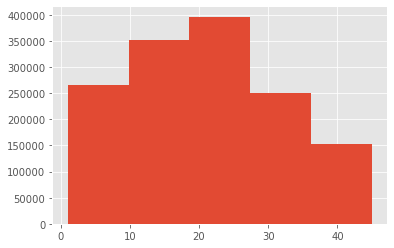

In [1153]:
def intervals(df, column):
    
    first_quantile = df[column].quantile(0.25)
    third_quantile = df[column].quantile(0.75)
    iqr = third_quantile - first_quantile
    
    if first_quantile - 1.5 * iqr<0:
        interval_low = 0
    else:
        interval_low = first_quantile - 1.5 * iqr
    
    if third_quantile + 1.5 * iqr > df[column].max():
        interval_high = df[column].max()
    else:
        interval_high = third_quantile + 1.5 * iqr
        
    return(interval_low, interval_high)

low,high = intervals(time_spend, 'days_num')

clear_time_spend=time_spend.query('(days_num>=@low) and (days_num<=@high)')
print(len(time_spend),len(clear_time_spend))
display(clear_time_spend['days_num'].hist(bins=5))

Отлично, значит выбросов нет. Датасет почти нескошен, Медиана должна быть лишь незначительно больше среднего

In [1154]:
clear_time_spend['days_num'].describe()

count    1.416812e+06
mean     2.084930e+01
std      1.123581e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.100000e+01
75%      2.900000e+01
max      4.500000e+01
Name: days_num, dtype: float64

Среднее 20.84, медиана 21... Ну возьмем 21 день за нормативный срок. Посмотрим на динамику отклонений от нормативного срока по недели выдачи, по каждому региону

In [1155]:
dinamic_week_out = clear_time_spend.pivot_table(index='week_out',columns='region',values='days_num',aggfunc='mean')-clear_time_spend['days_num'].median()
dinamic_week_in = clear_time_spend.pivot_table(index='week_in',columns='region',values='days_num',aggfunc='mean')-clear_time_spend['days_num'].median()

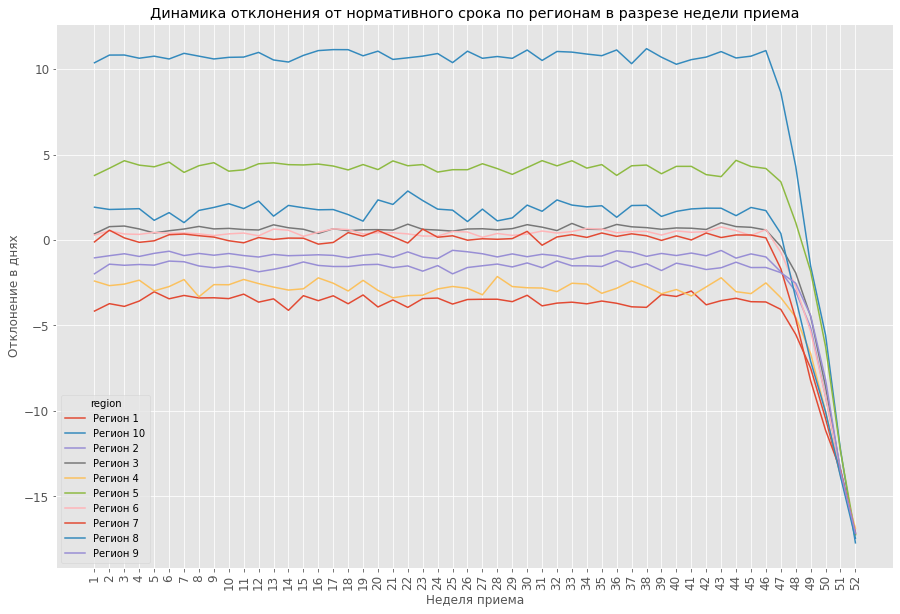

In [1156]:
import matplotlib.pyplot as plt   

title ="Динамика отклонения от нормативного срока по регионам в разрезе недели приема"
ax = dinamic_week_in[dinamic_week_in.columns].plot(kind='line', title=title,figsize=(15,10), legend=True, fontsize=12)
ax.set_xlabel("Неделя приема",fontsize=12)
ax.set_ylabel("Отклонение в днях",fontsize=12)
plt.xticks(time_spend['week_in'].sort_values(ascending=True).unique(), rotation=90)
plt.show()

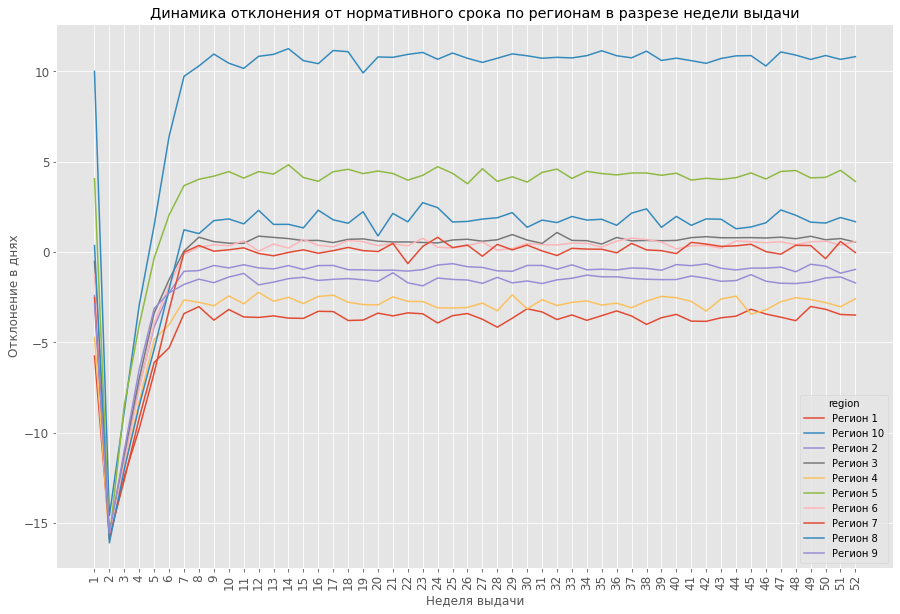

In [1157]:
title ="Динамика отклонения от нормативного срока по регионам в разрезе недели выдачи"
ax = dinamic_week_out[dinamic_week_out.columns].plot(kind='line', title=title,figsize=(15,10), legend=True, fontsize=12)
ax.set_xlabel("Неделя выдачи",fontsize=12)
ax.set_ylabel("Отклонение в днях",fontsize=12)
plt.xticks(time_spend['week_out'].sort_values(ascending=True).unique(), rotation=90)
plt.show()